In [45]:
import pandas as pd 
import numpy as np 
import pickle

In [46]:
df = pd.read_csv('heart.csv')
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [47]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
# ap_hi min value -150 (not possible)
# ap_lo min value -70 (not possible)
# ap_hi max value 16020 (not possible)
# ap_lo max value 11000 (not possible)

In [49]:
years = (df['age']/365).round(0)

In [50]:
del df['id']
del df['age']

In [51]:
df.insert(0,'years',years)
print(df.head())

   years  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   50.0       2     168    62.0    110     80            1     1      0   
1   55.0       1     156    85.0    140     90            3     1      0   
2   52.0       1     165    64.0    130     70            3     1      0   
3   48.0       2     169    82.0    150    100            1     1      0   
4   48.0       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


In [52]:
df.head(10)

,years,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0
5,60.0,1,151,67.0,120,80,2,2,0,0,0,0
6,61.0,1,157,93.0,130,80,3,1,0,0,1,0
7,62.0,2,178,95.0,130,90,3,3,0,0,1,1
8,48.0,1,158,71.0,110,70,1,1,0,0,1,0
9,54.0,1,164,68.0,110,60,1,1,0,0,0,0


In [53]:
df.describe()

,years,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.338686,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.765294,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
df.drop(df[df['ap_hi']>190].index, inplace = True)
df.drop(df[df['ap_hi']<100].index, inplace = True)
df.drop(df[df['ap_lo']>150].index, inplace = True)
df.drop(df[df['ap_lo']<70].index, inplace = True)
df.count()

years          65266
gender         65266
height         65266
weight         65266
ap_hi          65266
ap_lo          65266
cholesterol    65266
gluc           65266
smoke          65266
alco           65266
active         65266
cardio         65266
dtype: int64

In [55]:
df.drop(df[df['height']<120].index, inplace = True)
df.dropna()
df.count()
# df.drop(df[df['weight']<40].index, inplace = True)

years          65224
gender         65224
height         65224
weight         65224
ap_hi          65224
ap_lo          65224
cholesterol    65224
gluc           65224
smoke          65224
alco           65224
active         65224
cardio         65224
dtype: int64

In [56]:
df.describe()

,years,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,65224.000000,65224.000000,65224.000000,65224.000000,65224.000000,65224.000000,65224.000000,65224.000000,65224.000000,65224.000000,65224.000000,65224.000000
mean,53.446385,1.353857,164.520023,74.460794,127.587759,82.256271,1.370385,1.228352,0.088280,0.053615,0.803508,0.506501
std,6.731852,0.478169,7.912208,14.252479,15.510919,8.269656,0.684462,0.575221,0.283704,0.225259,0.397348,0.499962
min,30.000000,1.000000,120.000000,11.000000,100.000000,70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,49.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,59.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,190.000000,150.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
df.drop(df[df['height']>205].index, inplace = True)
df.drop(df[df['years']<20].index, inplace = True)
df.drop(df[df['years']<40].index, inplace = True)
df.describe()

,years,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,64873.000000,64873.000000,64873.000000,64873.000000,64873.000000,64873.000000,64873.000000,64873.000000,64873.000000,64873.000000,64873.000000,64873.000000
mean,53.524471,1.353444,164.510228,74.459464,127.619302,82.271222,1.371187,1.228909,0.088219,0.053427,0.803555,0.507977
std,6.664686,0.478043,7.904422,14.242800,15.512939,8.267223,0.685160,0.575836,0.283615,0.224886,0.397312,0.499940
min,40.000000,1.000000,120.000000,11.000000,100.000000,70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,49.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,59.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,198.000000,200.000000,190.000000,150.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
df.cardio.unique()

array([0, 1], dtype=int64)

In [59]:
df.cholesterol.unique()

array([1, 3, 2], dtype=int64)

In [60]:
df.gluc.unique()

array([1, 2, 3], dtype=int64)

In [61]:
df.smoke.unique()

array([0, 1], dtype=int64)

In [62]:
df.alco.unique()

array([0, 1], dtype=int64)

In [63]:
df.active.unique()

array([1, 0], dtype=int64)

In [64]:
df.cardio.value_counts()

1    32954
0    31919
Name: cardio, dtype: int64

In [65]:
df.loc[df.height.min()]

years           59.0
gender           1.0
height         156.0
weight          71.0
ap_hi          120.0
ap_lo           80.0
cholesterol      2.0
gluc             2.0
smoke            0.0
alco             0.0
active           1.0
cardio           1.0
Name: 120, dtype: float64

In [66]:
correlation = df.corr()
correlation

,years,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
years,1.000000,-0.031878,-0.094314,0.043878,0.194465,0.137689,0.152411,0.095466,-0.050722,-0.028775,-0.009728,0.227414
gender,-0.031878,1.000000,0.515558,0.151731,0.044045,0.048554,-0.040236,-0.023388,0.336682,0.170053,0.005543,-0.000413
height,-0.094314,0.515558,1.000000,0.300533,-0.007873,0.008394,-0.058535,-0.022602,0.193735,0.096973,-0.010252,-0.021431
weight,0.043878,0.151731,0.300533,1.000000,0.247515,0.228136,0.138842,0.105243,0.065943,0.066067,-0.016086,0.167348
ap_hi,0.194465,0.044045,-0.007873,0.247515,1.000000,0.721131,0.197136,0.091867,0.025218,0.033146,-0.000247,0.426057
ap_lo,0.137689,0.048554,0.008394,0.228136,0.721131,1.000000,0.164527,0.071106,0.023259,0.036738,-0.000580,0.337304
cholesterol,0.152411,-0.040236,-0.058535,0.138842,0.197136,0.164527,1.000000,0.450989,0.009178,0.034462,0.008970,0.218976
gluc,0.095466,-0.023388,-0.022602,0.105243,0.091867,0.071106,0.450989,1.000000,-0.006800,0.009595,-0.007801,0.085970
smoke,-0.050722,0.336682,0.193735,0.065943,0.025218,0.023259,0.009178,-0.006800,1.000000,0.340109,0.023565,-0.016868
alco,-0.028775,0.170053,0.096973,0.066067,0.033146,0.036738,0.034462,0.009595,0.340109,1.000000,0.022752,-0.008178


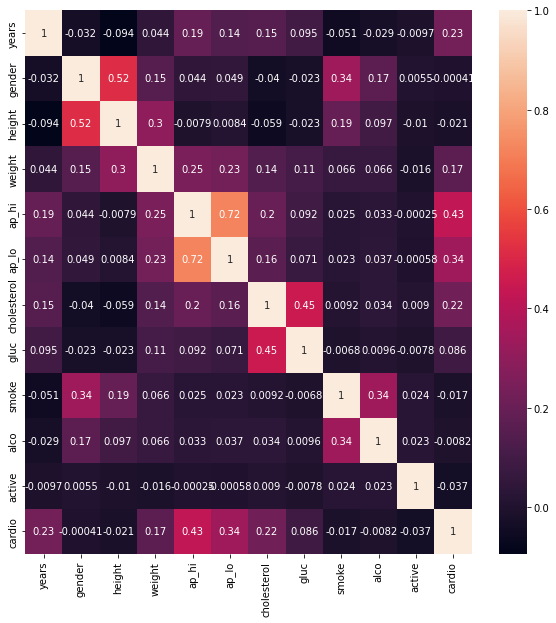

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True)
plt.show()

In [68]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=19)

#### **Logistic Regression** ####

In [85]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000)
model.fit(X_train, Y_train)
score = model.score(X_train, Y_train)
score

0.723789390235846

In [86]:
result = model.predict(X_test)

In [87]:
from sklearn.metrics import accuracy_score
prediction = accuracy_score(Y_test, result)
print("Test Accuracy =", prediction * 100, "%")

Test Accuracy = 72.34611036892406 %


#### **Support Vector Machines** ####

In [71]:
from sklearn.svm import SVC
model1 = SVC()
model1.fit(X_train, Y_train)
score1 = model1.score(X_train, Y_train)
score1

0.7199577194952764

In [74]:
result1 = model1.predict(X_test)

In [75]:
prediction1 = accuracy_score(Y_test, result1)
print("Test Accuracy =", prediction1 * 100, "%")

Test Accuracy = 71.61134518548967 %


#### **Gradient Boosting Classifier** ####

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
model2 =  GradientBoostingClassifier()
model2.fit(X_train, Y_train)
score2 = model2.score(X_train, Y_train)
score2

0.7333905881834798

In [78]:
result2 = model2.predict(X_test)

In [79]:
prediction2 = accuracy_score(Y_test, result2)
print("Test Accuracy =", prediction2 * 100, "%")

Test Accuracy = 73.14767238721612 %


#### **KNN** ####

In [82]:
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier(n_neighbors=5)
model3.fit(X_train,Y_train)
score = model3.score(X_train,Y_train)
score

0.7762216203122592

In [83]:
result3 = model3.predict(X_test)

In [84]:
prediction3 = accuracy_score(Y_test, result3)
print("Test Accuracy =", prediction3 * 100, "%")

Test Accuracy = 68.38968245812353 %


In [88]:
pickle.dump(model2, open('heart.pkl', 'wb'))

Dataset link: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset <br>
Developed by: Souvik Pal, Sudip Das, Sumit Gupta, Sumit Kr. Bera, Tarpan Das